# **Implementation of a shallow neural network for classification using Numpy**
# 1. Imports
- **Numpy** for data processing (More precisely: speeds up the computation time with it's vectorization functions).
- **matplotlib** to visualize a sample of images.
- **sklearn** has some nice datasets ready to use. We also import ``train_test_split`` to split the data into training and testing sets.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print('imported')

imported


# 2. Dataset preprocess :
### When working on neural networks, be sure to always shape your data as $(n, m)$ where $n$ is the number of input features, and $m$, the count of training examples.
### ``sklearn`` offers suitable datasets for regression and classification; we'll be using the ``make_moons`` function here. As its name suggests, it generates random data with distribution in the form of moons. The nature of the problem is a non-linear classification.
### Here's a more formal definition of how the data will be (I always prefer to stick to the mathematical notation) :
$$ X = \begin{bmatrix}
    x_0^{(1)} && x_0^{(2)} && x_0^{(3)} && ... && x_0^{(m)} \\
    x_1^{(1)} && x_1^{(2)} && x_1^{(3)} && ... && x_1^{(m)} \\
    x_2^{(1)} && x_2^{(2)} && x_2^{(3)} && ... && x_2^{(m)} \\
    ... && ... && ... && ... && ... \\
    x_n^{(1)} && x_n^{(2)} && x_n^{(3)} && ... && x_n^{(m)}
    \\
\end{bmatrix}, \;\;\; Y = 
\begin{bmatrix}
    y^{(1)} && y^{(2)} && y^{(3)} && ... && y^{(m)}
\end{bmatrix} $$

Total number of examples : 400
Train features shape : (2, 320)
Train labels shape : (1, 320)
Test features shape : (2, 80)
Test labels shape : (1, 80)


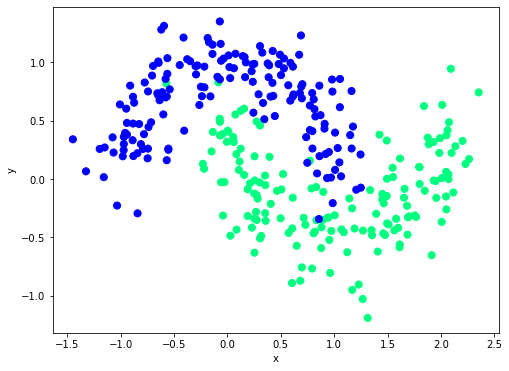

In [8]:
# 400 training examples should be enough for a simple binary classification problem
m = 400

x, y = sklearn.datasets.make_moons(n_samples=m, noise=.2)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2)
train_x, train_y = train_x.T, np.expand_dims(train_y, axis=0)
test_x, test_y = test_x.T, np.expand_dims(test_y, axis=0)

print('Total number of examples : {}'.format(m))
print('Train features shape : {}'.format(train_x.shape))
print('Train labels shape : {}'.format(train_y.shape))
print('Test features shape : {}'.format(test_x.shape))
print('Test labels shape : {}'.format(test_y.shape))

# visualizing the data
plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(train_x[0], train_x[1], c=train_y[0], s=50, cmap='winter')
plt.show()

# 3. Defining the **shallow neural network** model
### Shallow neural networks contain only a single hidden layer as opposed to deep neural networks, which have several hidden layers and often of various types. I will cover several points in this text and explain the implementation of the model.
## 1. Weights initialization :
- Weights dimension for a given layer $L$ has always to be $(a^L, a^{L - 1})$ according to the mathematical model. $a^{L}$ is the number of outputs of the layer $L$, and $a^0$ is the number of input features. $a$ stands for "activation".
- Initializing weights with a gaussian distribution around 0 is a good method to speed up the learning. The gradient is at its higher value when weights are around 0 (derivative of activation function has a bell curve around $0$).
$$ w_i \sim \mathcal{N}(\mu, \sigma^2) \times 0,01$$
- $\mu$ is the mean and $\sigma^2$ the variance ($\mu = 0, \sigma^2 = 1$).
- Another way to initialize weights is to use the Xavier initialization method :
$$ w_i \sim \mathcal{U}[-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}}]$$
- $n$ is the size of the previous layer.
- Here's the numpy equivalent : ``wi/bi = np.random.uniform(shape) / np.sqrt(n)``
## 2. Forward propagation :
- Since the input features are centered around $0$, using a $tanh$ activation over $sigmoid$ in the hidden layer is better because it offers faster learning.
- Output activation is a $sigmoid$ since it's a binary classification problem.
$$ a_1 = tanh(w_1X + b_1) $$
$$ a_2 = sigmoid(w_2a^1 + b_2) $$

## 3. Loss and cost function :
- *Note* : The loss function measures the loss for a single training example, while the cost function measures the loss for the whole training set. We'll need the cost value after each iteration in order to compute gradients.
- *Rule* : Binary classification problem $\Longleftrightarrow$ Binary-cross entropy loss.
$$ \mathcal{L}(x, y) = BSE(x, y) = - y log(\hat{y}) - (1 - y) log(1 - \hat{y})$$
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(x^{(i)}, y^{(i)}) $$

## 4. Backward propagation (Gradient descent):
- By applying the chain rule, we compute the gradients and update the weights. Without going in-depth, here are some of the formulas that needs to be implemented :
$$ gradient \;\; descent \;\; : \;\; w_j := w_j - \eta \times \frac{\partial}{\partial w_j}J(w_1, b_1, w_2, b_2) $$
- Chain rule application :
$$\frac{\partial J}{\partial w_1} = \frac{\partial J}{\partial a_2}
\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1}\frac{\partial z_1}{\partial w_1}$$
$$ \frac{\partial J}{\partial w_2} = \frac{\partial J}{\partial a_2}
\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial w_2}$$
$$ dw_2 = (\hat{y} - y) \times x_2 $$
$$ db_2 = (\hat{y} - y) $$
$$ dw_1 = (\hat{y} - y) \times w_2 \times \delta'(z_1) \times x_1 $$
$$ db_1 = (\hat{y} - y) \times w_2 \times \delta'(z_1) $$
Where $\delta'$ is the derivative of the tanh.


In [86]:
class NeuralNetwork:
    def __init__(self, n_inputs, hidden_layer_units=4):
        self.hidden_layer_units = hidden_layer_units
        self.n_inputs = n_inputs
        self.w1 = np.random.randn(self.hidden_layer_units, self.n_inputs) * 0.01
        self.b1 = np.zeros((self.hidden_layer_units, 1))
        self.w2 = np.random.randn(1, self.hidden_layer_units) * 0.01
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        z1 = np.dot(self.w1, X) + self.b1
        a1 = self.tanh(z1)
        z2 = np.dot(self.w2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return z1, a1, z2, a2

    def backward(self, X, y_true, z1, a1, a2):
        m = X.shape[0]
        dz2 = a2 - y_true
        dW2 = (1 / m) * np.dot(dz2, a1.T)
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.w2.T, dz2) * self.tanh_derivative(z1)
        dW1 = (1 / m) * np.dot(dz1, X.T)
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2, learning_rate):
        self.w1 -= learning_rate * dW1
        self.w2 -= learning_rate * dW2
        self.b1 -= learning_rate * db1
        self.b2 -= learning_rate * db2

    def train(self, X, y_true, epochs=100, step=10, verbose=1, learning_rate=.001):
        print('Training started (X.shape: {}) ...'.format(X.shape))
        for i in range(epochs):
            z1, a1, z2, a2 = self.forward(X)
            dW1, db1, dW2, db2 = self.backward(X, y_true, z1, a1, a2)
            self.update_weights(dW1, db1, dW2, db2, learning_rate)

            if i % step == 0:
                print('Epoch: {}'.format(i))
                print('Cost: {}'.format(self.cost(y_true, a2)))
        if verbose == 1:
            print('w1: {}'.format(self.w1))
            print('w2: {}'.format(self.w2))
            print('b1: {}'.format(self.b1))
            print('b2: {}'.format(self.b2))

    def predict(self, X):
        z1, a1, z2, a2 = self.forward(X)
        return np.round(a2)

    def binary_cross_entropy(self, y_true, y_pred):
        return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def loss(self, y_true, y_pred):
        return self.binary_cross_entropy(y_true, y_pred)

    def cost(self, y_true, y_pred):
        return np.mean(self.loss(y_true, y_pred))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def print_weights_shapes(self):
        print('w1 shape : {}'.format(self.w1.shape))
        print('w2 shape : {}'.format(self.w2.shape))
        print('b1 shape : {}'.format(self.b1.shape))
        print('b2 shape : (1)')


In [87]:
nn = NeuralNetwork(2, 5)
nn.train(train_x, train_y, epochs=5000, step=200, verbose=0, learning_rate=.01)

Training started (X.shape: (2, 320)) ...
Epoch: 0
Cost: 0.6931566315306045
Epoch: 200
Cost: 0.2962314978343727
Epoch: 400
Cost: 0.2949186626948187
Epoch: 600
Cost: 0.14778504066059067
Epoch: 800
Cost: 0.07167459400916595
Epoch: 1000
Cost: 0.06426170398266684
Epoch: 1200
Cost: 0.062109124337854725
Epoch: 1400
Cost: 0.06108580839373583
Epoch: 1600
Cost: 0.06042698693720834
Epoch: 1800
Cost: 0.05992774683235841
Epoch: 2000
Cost: 0.05951825317661934
Epoch: 2200
Cost: 0.059168775942790686
Epoch: 2400
Cost: 0.058863574346312196
Epoch: 2600
Cost: 0.058592716778020734
Epoch: 2800
Cost: 0.058349232746206924
Epoch: 3000
Cost: 0.058127974291124165
Epoch: 3200
Cost: 0.05792505430868504
Epoch: 3400
Cost: 0.057737500105578446
Epoch: 3600
Cost: 0.057563008340329035
Epoch: 3800
Cost: 0.057399763826043185
Epoch: 4000
Cost: 0.057246305850060075
Epoch: 4200
Cost: 0.05710143118340798
Epoch: 4400
Cost: 0.05696412503505963
Epoch: 4600
Cost: 0.05683351284635679
Epoch: 4800
Cost: 0.0567088273955594


# Tests

In [88]:
pred = nn.predict(test_x)
print('Accuracy: {}%'.format(np.mean(pred == test_y) * 100))

Accuracy: 95.0%
